In [1]:
import os
from time import time

import cv2

import numpy as np

from matplotlib import pyplot as plt
import matplotlib.animation as animation

In [2]:
def read_image(image_path, plot=False):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    if plot:
        plt.imshow(img)
        plt.show()
    return img

def show_compare(images: list, image_names: list = [], special_cmap: dict = {}):
    count = len(images)
    count_names = len(image_names)
    fig, axes = plt.subplots(1, count)
    if count == 1:
        axes = [axes]
    for cnt in range(count):
        if cnt in special_cmap or -(count - cnt) in special_cmap:
            axes[cnt].imshow(images[cnt], cmap=special_cmap.get(cnt, special_cmap.get(-(count - cnt))))
        else:
            axes[cnt].imshow(images[cnt])
        axes[cnt].axis('off')
        if cnt < count_names:
            axes[cnt].set_title(image_names[cnt])
    plt.show()

In [3]:
def scale(image):
    minimum = np.min(image)
    filtered = (255*(image - minimum)/np.ptp(image)).astype(np.uint8)
    return filtered

    
def clip(image):
    filtered = np.clip(image, 0, 255).astype(np.uint8)
    return filtered

def final_remake_to_image(image, kernel):
    sharpen = np.array([
        [0, -1, 0,],
        [-1, 5, -1,],
        [0, -1, 0,],
    ])
    if np.sum(kernel) == 0 or (kernel.shape == sharpen.shape and np.all(kernel  == sharpen)):
        print("Cliping array...")
        filtered = clip(image)
    else:
        print("Scaling array...")
        filtered = scale(image)
    return filtered


def apply_kernel_filter(image: np.ndarray, kernel: np.ndarray) -> np.ndarray:
    kh, kw = kernel.shape
    H, W, C = image.shape

    pad_h = kernel.shape[0]//2
    pad_v = kernel.shape[1]//2

    image_with_kernel = image.copy()
    image_padded = np.pad(image, ((pad_h, pad_h), (pad_v, pad_v), (0, 0)), mode='edge')

    image_with_kernel = np.zeros_like(image, dtype=np.float32)

    for ch in range(C):
        windows = np.zeros((H, W, kh, kw), dtype=np.float32)
        for i in range(kh):
            for j in range(kw):
                windows[:, :, i, j] = image_padded[i:i+H, j:j+W, ch]

        image_with_kernel[..., ch] = np.sum(windows * kernel, axis=(2, 3))

    return final_remake_to_image(image_with_kernel, kernel)

# apply_kernel_filter(image_float, gaussian)

In [4]:
image_paths = ["../data/" + path for path in os.listdir("../data")]
plt.rcParams['figure.figsize'] = [15, 10]

Виконати проєктування програмного додатку для PC, який:
<!-- $$ -->
a. виконує інвертування кольорової інтенсивності пікселів завантаженого користувачем зображення. Вивести вхідне та отримане зображення;

b. для деякої (однієї з трьох) компонент виконує зміну, наприклад, до кожного пікселя додає якесь постійне значення. Вивести усі зображення в об’єкти типу ImageView.

c. виконує розбивку зображення на компоненти Red, Green та Blue.

d. виконує «злиття» двох зображень у певних пропорціях (долях від одиниці, яка береться за 100%). Наприклад, якщо «вклад» першого зображення у нове складає 0.4, то «вклад» другого – 1-0.4=0.6. У загальному «вклад» першого зображення позначимо через α, а «вклад» другого – (1 − α). Тоді шукане зображення можна записати у наступному вигляді:

Imagenew = α ∙ Image1 + (1 − α)Image2.

За додаткові бали передбачити те, що α – змінна величина, α ∈ (0; 1).
Крок зміни обрати самостійно. Вивести анімацію зображень на екран
програмного застосунку.

e. виконує фільтрацію вхідного зображення з використанням матричних фільтрів, що описані у лабораторній роботі (фільтр розмиття, фільтр поліпшення чіткості, медіанний фільтр, фільтр ерозії і нарощування та фільтр Собеля).

f. виконує вбудовування водяного знаку зображення. Для процесу вбудовування водяний знак перетворити до бінарного (чорно-білого, не сірого!). Використати для вбудовування метод найменшого значущого біта. Параметр «номер бітової площини» (натуральне число, менше за 9) вивести на форму головного вікна для відображення різниці в результатах вбудовування. Водяний знак вбудовувати у канал Blue. Передбачити випадок різних розмірів вхідного зображення (контейнера) та водяного знаку. Якщо вхідне зображення більше за водяний знак, виконати вбудовування циклічно та періодично для всього вхідного зображення (замостити вхідне зображення водяним знаком). Якщо вхідне зображення менше за водяний знак, вбудувати частину водяного знаку для всього вхідного зображення.

g. Додатковий бал передбачається з встворення методу, який виконує вилучення вонядного знаку із заповненого конейнега (зображення з водяним знаком) для завдання 7 даної лабораторної роботи.
<!-- $$ -->

../data/1344829.png
Scaling array...


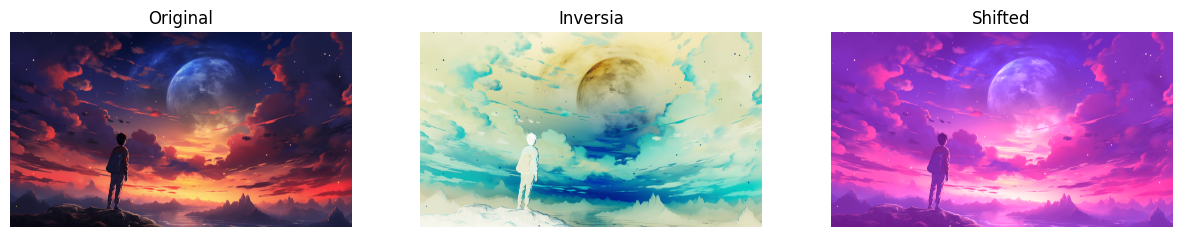

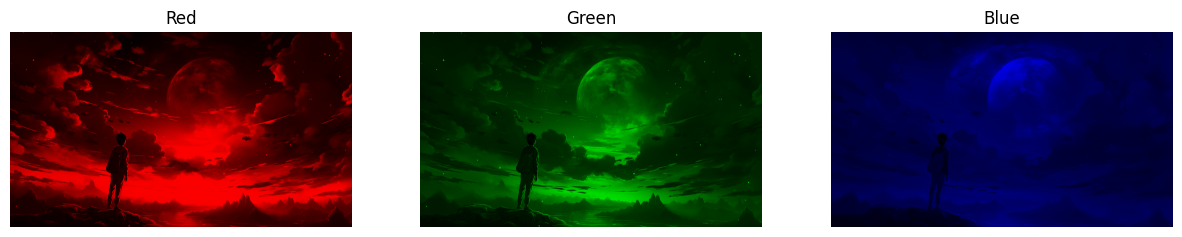

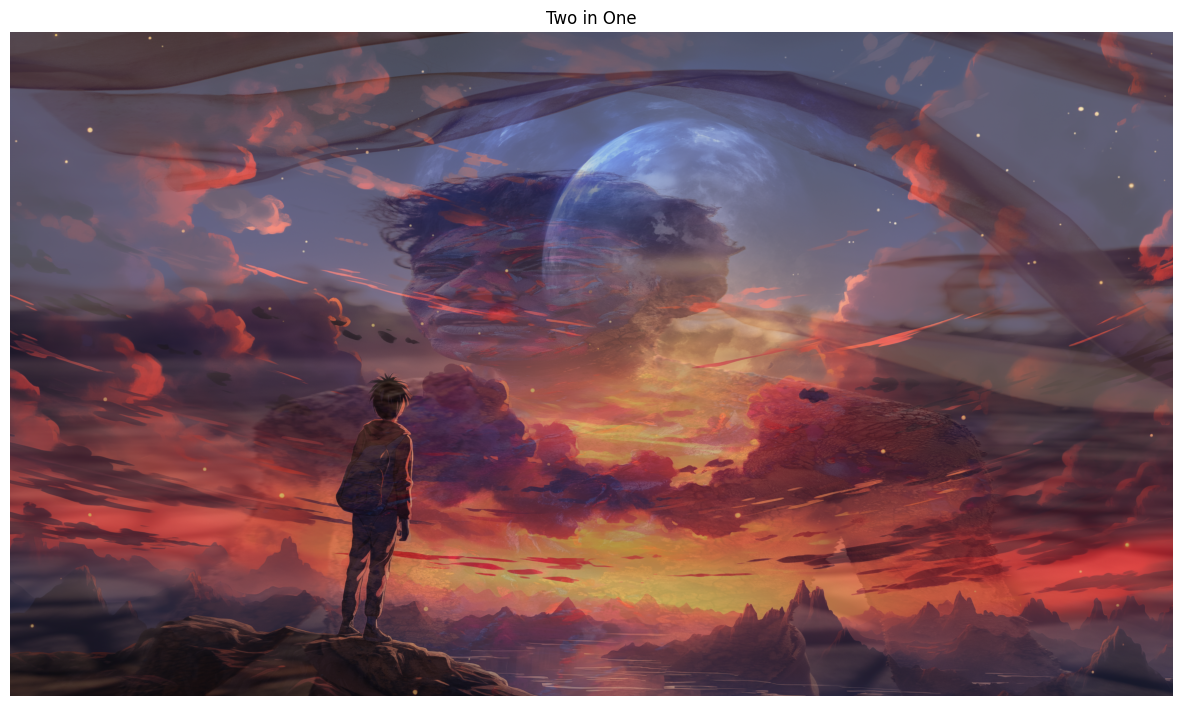

In [ ]:
# visible_diff = ["../data/1344829.png", "../data/1350497.png", "../data/dark.png", "../data/kodim01.png", "../data/kodim05.jpg", "../data/kodim07.png", "../data/tire.png"]
def inverse(image):
    inversia_kernel = np.array([[0, 0, 0], [0, -1, 0], [0, 0, 0]])
    image_inversia = apply_kernel_filter(image, inversia_kernel)
    return image_inversia

def shift(image, shifts, channels):
    image_shifted = image.astype(float)
    for shift, channel in zip(shifts, channels):
        image_shifted[..., channel] = clip(image_shifted[..., channel] + shift)
    image_shifted = image_shifted.astype(np.uint8)
    return image_shifted

def extract_all_colors(image):
    image_rgb = image.copy()
    image_r, image_g, image_b = np.zeros_like(image), np.zeros_like(image), np.zeros_like(image)
    image_r[..., 0], image_g[..., 1], image_b[..., 2] = image_rgb[..., 0], image_rgb[..., 1], image_rgb[..., 2]
    return image_r,image_g,image_b

def combine_two_images(image_1, image_2, alpha):
    image_1 = image_1.astype(float)
    image_2 = cv2.resize(image_2, image.shape[:2][::-1]).astype(float)
    image_two = clip(alpha * image_1 +  (1 - alpha) * image_2)
    return image_two

def create_anim_for_combine(image_1, image_2):
    text_1 = time()
    fig, ax = plt.subplots()
    img_show = ax.imshow(image_1)
    def update(alpha):
        img_show.set_data(combine_two_images(image_1, image_2, alpha))

    anim = animation.FuncAnimation(fig, update, frames=np.linspace(0, 1, 100)[::-1], interval=1000)
    text_2 = time()
    anim.save(f'combine_two_images_{text_1}_{text_2}.gif', writer='pillow', fps=30)
    plt.close()

for image_path in image_paths:
# for image_path in visible_diff:
    print(image_path)
    image = read_image(image_path)
    image_prev = read_image(image_paths[image_paths.index(image_path) - 1])

    image_inversia = inverse(image)

    shifts, channels = [100, 20, 120], [0, 1, 2]
    image_shifted = shift(image, shifts, channels)

    image_r, image_g, image_b = extract_all_colors(image)

    alpha = 0.7
    image_two = combine_two_images(image, image_prev, alpha)

    create_anim_for_combine(image, image_prev)

    images = [image, image_inversia, image_shifted]
    names = ["Original", "Inversia", "Shifted"]
    show_compare(images, names)

    images = [image_r, image_g, image_b]
    names = ["Red", "Green", "Blue"]
    show_compare(images, names)

    images = [image_two]
    names = ["Two in One"]
    show_compare(images, names)

    # break
